Calculate total variance (without WKB normalization) in runs with and without bay

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
nx = 512
ny = 612
nz = 76
dt = 600

depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

### No bay run

In [5]:
tini = 0
tend = 144
Wacc = np.empty((nz,ny,nx))

mask_ext = np.expand_dims(mask,0)
mask_ext = mask_ext + np.zeros_like(ds2.variables['WVEL'][tini:tend,...])
Wmean = np.nanmean(np.ma.masked_array(ds2.variables['WVEL'][tini:tend,...],
                                      mask=mask_ext),axis=0)

for tt in range(tini,tend):
    W = np.ma.masked_array(ds2.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + (W-Wmean)**2    

In [6]:
VarNoB = np.nansum((Wacc*dt))/(time[tend]-time[tini])
VarNoB

0.0024568781923861994

In [6]:
tend2 = 288
for tt in range(tend,tend2):
    W = np.ma.masked_array(ds2.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + W**2    

In [7]:
VarNoB_2d = np.nansum((Wacc*dt))/(time[tend2]-time[tini])
VarNoB_2d

0.004669825769226912

In [8]:
tend3 = 144*3
for tt in range(tend2,tend3):
    W = np.ma.masked_array(ds2.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + W**2    

In [9]:
VarNoB_3d = np.nansum((Wacc*dt))/(time[tend3]-time[tini])
VarNoB_3d

0.003233239904474046

In [10]:
tend4 = (144*5)-1
for tt in range(tend3,tend4):
    W = np.ma.masked_array(ds2.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + W**2    

In [11]:
VarNoB_5d = np.nansum((Wacc*dt))/(time[tend4-1]-time[tini])
VarNoB_5d

0.0020129754419864966

### Run with SVB

In [12]:
Wacc = np.empty((nz,ny,nx))

for tt in range(tini,tend):
    W = np.ma.masked_array(ds.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + W**2

In [13]:
VarBay = np.nansum((Wacc*dt))/(time[tend]-time[tini])
VarBay

0.007768728878617569

In [14]:
for tt in range(tend,tend2):
    W = np.ma.masked_array(ds.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + W**2

In [15]:
VarBay_2d = np.nansum((Wacc*dt))/(time[tend2]-time[tini])
VarBay_2d

0.004673936636189143

In [16]:
for tt in range(tend2,tend3):
    W = np.ma.masked_array(ds.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + W**2

In [17]:
VarBay_3d = np.nansum((Wacc*dt))/(time[tend3]-time[tini])
VarBay_3d

0.00323630580571749

In [18]:
for tt in range(tend3,tend4):
    W = np.ma.masked_array(ds.variables['WVEL'][tt,...], mask=mask)
    Wacc = Wacc + W**2    

In [19]:
VarBay_5d = np.nansum((Wacc*dt))/(time[tend4-1]-time[tini])
VarBay_5d

0.0020143034754981676

### Proportion

In [20]:
perc = ((VarBay-VarNoB)/VarNoB)*100
perc
perc_2d = ((VarBay_2d-VarNoB_2d)/VarNoB_2d)*100
perc_2d
perc_3d = ((VarBay_3d-VarNoB_3d)/VarNoB_3d)*100
perc_3d
perc_5d = ((VarBay_5d-VarNoB_5d)/VarNoB_5d)*100
perc_5d

0.06597365690464645

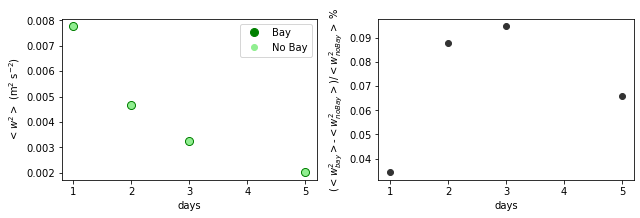

In [27]:
fig, (ax,ax1) = plt.subplots(1,2, figsize=(9,3))
ax.plot([1,2,3,5], [VarBay, VarBay_2d, VarBay_3d, VarBay_5d],'go',markersize=8, label='Bay')
ax.plot([1,2,3,5], [VarNoB, VarNoB_2d, VarNoB_3d, VarNoB_5d],'o' ,color='lightgreen', 
        label='No Bay')
ax.set_xlabel('days')
ax.set_ylabel('$<w^2>$ (m$^2$ s$^{-2}$)')
ax.legend()

ax1.plot([1,2,3,5], [perc, perc_2d, perc_3d, perc_5d],'o', color='0.2')
ax1.set_xlabel('days')
ax1.set_ylabel(r'($<w_{bay}^2>$-$<w_{noBay}^2>$)/$<w_{noBay}^2>$ %')
ax1.set_title
plt.tight_layout()